![](image/2023-02-09-09-35-08.png)

Image Credits: [Unsplash - Tech Daily](https://unsplash.com/photos/lKYV7FaUMzA)

# HDSC FALL'22 Capstone Project: Currency Foreign Exchange Rates
## A Project by Team Pycaret

### INTRODUCTION
In finance, an exchange rate is the rate at which one currency will be exchanged for another currency. It reflects the value of one currency relative to another currency. It is an important aspect in the global economy as it affects international trade and investment. The currency exchange rate can be determined by various factors such as government policies, interest rates, inflation, political stability and more.

The International Monetary Fund (IMF) is an international organization that aims to promote international monetary cooperation, facilitate international trade, and reduce poverty around the world. The IMF works to ensure the stability of the international monetary system—the system of exchange rates and international payments that enables countries to transact with each other. It provides policy advice, financial support, and technical assistance to its member countries, and it acts as a forum for international economic cooperation and decision-making. The IMF's main objectives are to promote international monetary cooperation, facilitate the balanced growth of international trade, promote exchange rate stability, and assist in the establishment of a multilateral system of payments. 

### PROBLEM STATEMENT
Forecasting the exchange rate of multiple currencies using historical exchange rate data and external economic indicators. To get the findings on how to control inflation and have a study on the development state by means of economic statistics of all countries by analysing whether the government has introduced better monetary policies based on IMF (International Monetary Fund) rules and regulations. 

### OBJECTIVE
To predict and forecast the closing exchange rate of any specific currencies. Here we perform a Time Series Analysis and build an ARIMA, Prophet and Regression  model. Results will be compared by evaluating the metrics then predicting and forecasting future values of Euro (EUR) or United States Dollar (USD) currency with respect to the other currencies.

In addition,
The objectives that we can provide with the currency exchange rate dataset include:
> Analyzing the trend and patterns in the currency exchange rate over a certain period of time.
>
>Evaluating the performance of different currencies and assessing their stability and risk.



### DATASET DESCRIPTION
This is a historical dataset of currency foreign exchange rates. This dataset includes 113 currencies in total with exchange values in varied permutations. It can be used for various task like time series analysis and forecasting. There are approximately 1.4million rows and 7 columns in the dataset.

The data has two main columns in particular:
* slug
* currency
> Slug column is of the form "ABC/PQR" where ABC and PQR are standard active currency codes as of ISO 4217.
>
>Currency contains a currency code which is the unit of the value in the tables. For examples, if slug is JPY/INR and currency is INR it means that
<center>1 JPY = xINR</center>
where x is in INR

The other columns are the regular OHLC (Open - High - Low - Close) columns along with the date

### PROCESS FLOW
![](image/2023-02-20-09-18-36.png)


In [1]:
import main_functions as mfn
import plotly.offline as po
po.init_notebook_mode(connected=True)

In [2]:
mfn.data_preview()

,slug,date,open,high,low,close,currency
0,GBP/EGP,2001-04-10,5.58090,5.5947,5.5947,5.5947,EGP
1,GBP/EGP,2001-06-04,5.47517,5.4939,5.4939,5.4939,EGP
2,GBP/EGP,2001-08-01,5.67990,5.6543,5.6543,5.6543,EGP
3,GBP/EGP,2002-07-29,7.21700,7.2170,7.2170,7.2170,EGP
4,GBP/EGP,2003-01-02,7.42429,7.3899,7.3899,7.3899,EGP


In [3]:
slug_splt = mfn.slug_split()
slug_splt.head()

,slug,date,open,high,low,close,currency,A,B
0,GBP/EGP,2001-04-10,5.58090,5.5947,5.5947,5.5947,EGP,GBP,EGP
1,GBP/EGP,2001-06-04,5.47517,5.4939,5.4939,5.4939,EGP,GBP,EGP
2,GBP/EGP,2001-08-01,5.67990,5.6543,5.6543,5.6543,EGP,GBP,EGP
3,GBP/EGP,2002-07-29,7.21700,7.2170,7.2170,7.2170,EGP,GBP,EGP
4,GBP/EGP,2003-01-02,7.42429,7.3899,7.3899,7.3899,EGP,GBP,EGP


#Check the Possiblities for CurA and CurB

In [4]:
curA, curB = mfn.uniq_cur()
print('There are only 7 unique possible currency on the left side of the pair \n')
print(curA)
print('='*100)
print('There are 113 unique currency on the right side of the pair \n')
print(curB)

There are only 7 unique possible currency on the left side of the pair 

['GBP' 'EUR' 'AUD' 'JPY' 'CHF' 'USD' 'INR']
There are 113 unique currency on the right side of the pair 

['EGP' 'SCR' 'NOK' 'SZL' 'MYR' 'PKR' 'NZD' 'CUP' 'CAD' 'CHF' 'ZMW' 'FJD'
 'XOF' 'IDR' 'JPY' 'UAH' 'TWD' 'MMK' 'BRL' 'CNY' 'HUF' 'MXN' 'BMD' 'KWD'
 'BBD' 'TTD' 'SEK' 'BWP' 'HNL' 'CZK' 'ISK' 'LKR' 'USD' 'RON' 'EUR' 'TND'
 'ZAR' 'SGD' 'BYN' 'PEN' 'XPF' 'THB' 'GBP' 'KRW' 'AUD' 'MOP' 'PGK' 'PHP'
 'BSD' 'CRC' 'JOD' 'MZN' 'TRY' 'BGN' 'DJF' 'COP' 'INR' 'BAM' 'PLN' 'SAR'
 'ARS' 'IRR' 'NIO' 'MWK' 'LBP' 'IQD' 'KES' 'UGX' 'KZT' 'NGN' 'GTQ' 'PYG'
 'ETB' 'SVC' 'VND' 'BND' 'MAD' 'KYD' 'ILS' 'MKD' 'HKD' 'RUB' 'AED' 'GMD'
 'BZD' 'SLL' 'MVR' 'DKK' 'MUR' 'JMD' 'OMR' 'DZD' 'BOB' 'GHS' 'RSD' 'TZS'
 'UZS' 'BDT' 'CLP' 'MGA' 'QAR' 'ANG' 'HTG' 'BHD' 'ALL' 'BIF' 'SOS' 'MDL'
 'PAB' 'XAF' 'SDG' 'DOP' 'UYU']


Data Visualization

In [5]:
mfn.plot_viz('GBP', ohlc=True,  end=3)

#Choose a CurA

In [6]:
A_data = mfn.select_curA()

Below are the possible currency B for USD 
 ==================================================================================================== ['ZMW' 'KWD' 'EGP' 'BRL' 'XOF' 'NOK' 'HNL' 'CZK' 'BYN' 'XPF' 'GBP' 'MZN'
 'MMK' 'JPY' 'NIO' 'CNY' 'IQD' 'DJF' 'SAR' 'ETB' 'BND' 'SZL' 'COP' 'KRW'
 'LKR' 'NZD' 'BWP' 'HKD' 'TTD' 'MKD' 'ARS' 'SLL' 'MWK' 'SGD' 'ILS' 'ZAR'
 'PLN' 'TWD' 'HUF' 'JMD' 'RUB' 'PHP' 'EUR' 'RSD' 'UZS' 'BDT' 'IDR' 'CRC'
 'VND' 'RON' 'PKR' 'AUD' 'PEN' 'KZT' 'BGN' 'DKK' 'QAR' 'SEK' 'MGA' 'CAD'
 'ISK' 'TND' 'MUR' 'THB' 'CLP' 'CHF' 'SOS' 'INR' 'UAH' 'MDL' 'AED' 'TRY'
 'MYR' 'GTQ' 'GHS' 'SDG' 'UYU' 'PGK' 'MAD' 'NGN' 'MXN']


Shapes of all currency combos for chosen cur a

In [7]:
mapp = mfn.posB_dfs(A_data, shape=True, x=10)

ZMW (2234, 9)
KWD (4574, 9)
EGP (5009, 9)
BRL (4164, 9)
XOF (4593, 9)
NOK (5041, 9)
HNL (4591, 9)
CZK (4580, 9)
BYN (2759, 9)
XPF (4600, 9)


Choose a Currency B

In [8]:
A_B = mfn.select_curB(mapp)

Missing entries 
DatetimeIndex(['2003-12-06', '2003-12-07', '2003-12-13', '2003-12-14',
               '2003-12-20', '2003-12-21', '2003-12-27', '2003-12-28',
               '2004-01-03', '2004-01-04',
               ...
               '2021-07-31', '2021-08-01', '2021-08-07', '2021-08-08',
               '2021-08-14', '2021-08-15', '2021-08-21', '2021-08-22',
               '2021-08-28', '2021-08-29'],
              dtype='datetime64[ns]', length=1904, freq=None)


#Data Preprocessing: Upsampling and forward fill


In [9]:
weekly = mfn.upsample(A_B)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)
open     6
high     6
low      6
close    0
dtype: int64
Weekly Data Shape: (927, 4)


Plot all features to check if any independant features are present

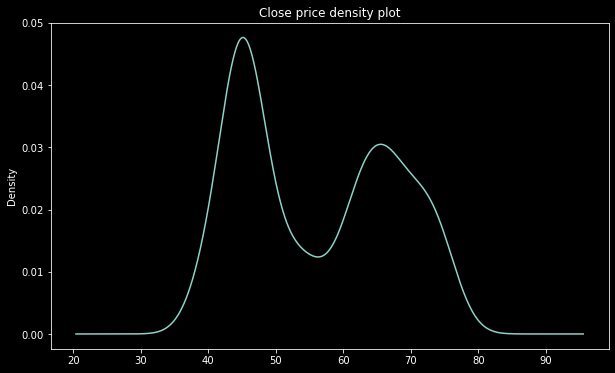

In [10]:
mfn.weekly_plot(weekly, closing=True, kde=True)

#Visualize the stationarity using rolling stats and check ADF test values

In [11]:
mfn.test_stationarity(weekly[0]['close'])

Results of dickey fuller test
Test Statistics                 -0.270710
p-value                          0.929551
No. of lags used                 7.000000
Number of observations used    919.000000
critical value (1%)             -3.437486
critical value (5%)             -2.864690
critical value (10%)            -2.568447
dtype: float64


#Decompose time series to visualize Trends, Seasonalities and Residuals

<Figure size 720x432 with 0 Axes>

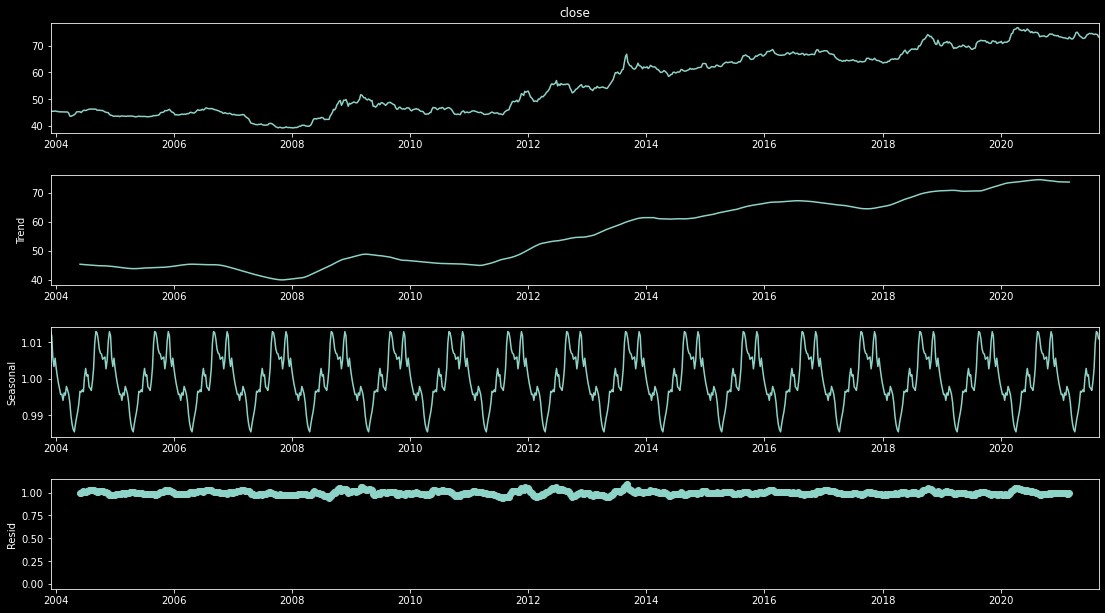

In [12]:
mfn.seasonal_decomp(weekly[0]['close'])

#use log to stabilize the time series and make it stationary

In [13]:
df_log = mfn.conv_to_statn(weekly[0]['close'])

In [14]:
train, test = mfn.train_test_split(df_log)

### Auto Arima

This is a type of ARIMA model that automatically chooses the most optimal values for the parameters like 
p: the order of auto-regeression, 
d: the order of integration, 
and q: the order of moving average.

Auto arima works by performing differencing tests(Canova-Hansen method of finding optimal order of seasonal differencing is used.). 
It moves through all combinations of p, q, d in a given range and selects the fit with the least value for a chosen metric. 
Metrics commonly used are Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller, or Phillips–Perron.
We have chosen to use ADF metric for our time series analysis.

We have use auto arima to save time while building and tuning our model since 
it would be tedious to select optimal p, q, d values for all 300+ currency pairs in our dataset. 
The end result is a better fitted model and more accurate prdeictions for our forecasting project.

Summary plots:
The residual errors appear to have a uniform variance and fluctuate around a mean of zero.
The density plot on the top right suggests a normal distribution with a mean of zero.
The red line is aligned with all of the dots. Any significant deviations would indicate a skewed distribution.
The residual errors are not autocorrelated. Any autocorrelation would imply that the residual errors have a pattern that isn’t explained by the model.

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5565.206, Time=0.63 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5624.496, Time=1.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5619.100, Time=3.96 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5563.677, Time=0.59 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-5622.913, Time=3.59 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5622.960, Time=2.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-5620.528, Time=4.99 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-5624.453, Time=1.37 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 18.442 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  831
Model:               SARIMAX(1, 1, 0)   Log Likelihood                2815.248
Date:                Tue, 21 Feb 2023   AIC                          -5624.496
Time:                      

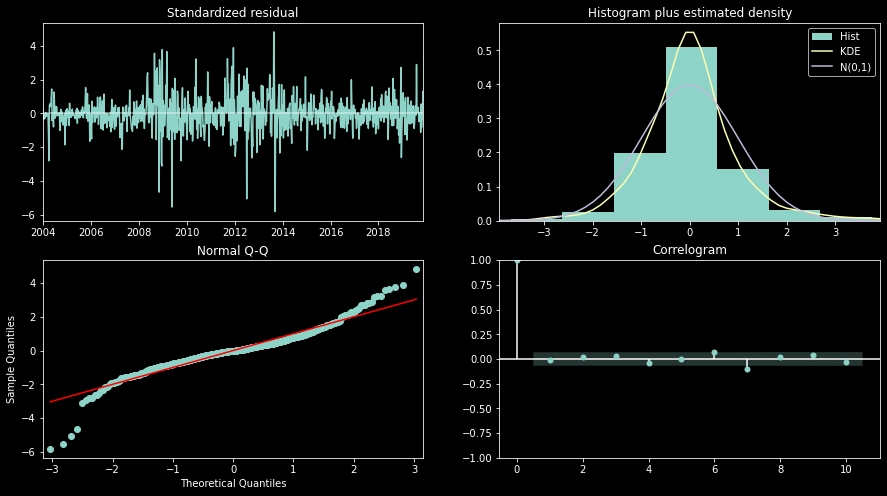

In [15]:
mfn.aut_arima(train)

### ARIMA Model

An ARIMA model is created by using pmdarima module. 
The order parameter expects a tuple of three integers representing the number of autoregressive (p), differencing (d), and moving average (q) 
terms to include in the model.
These parameters are extracted from the auto-arima model in the previous step by using the order() function.
The model information, coefficient estimates, model diagnostics, Information criteria and residuals are printed using the fitted summary function.

The forecast() method is used to generate a forecast for the next n time periods in the time series using the fitted ARIMA model. 
n is the number of test records.

To evaluate the fitting by ARIMA, we have used the below metrics:
1.	Mean Squared Error (MSE): MSE measures the average squared difference between the predicted and actual 
values of a time series. A lower MSE value indicates better performance. The formula for MSE is:
MSE = (1/n) * Σ(actual_i - predicted_i)^2
where n is the number of observations in the time series, actual_i is the actual value of the i-th observation, 
and predicted_i is the predicted value of the i-th observation.
2.	Root Mean Squared Error (RMSE): RMSE is the square root of the MSE, and it measures the average distance 
between the predicted and actual values of a time series. Like MSE, a lower RMSE value indicates better performance. 
The formula for RMSE is:
RMSE = sqrt((1/n) * Σ(actual_i - predicted_i)^2)
3.	Mean Absolute Error (MAE): MAE measures the average absolute difference between the predicted and 
actual values of a time series. It is less sensitive to outliers than MSE and RMSE. The formula for MAE is:
MAE = (1/n) * Σ|actual_i - predicted_i|
4.	Mean Absolute Percentage Error (MAPE): MAPE measures the average percentage difference between the predicted and 
actual values of a time series. It is often used to evaluate the accuracy of forecasting models. The formula for MAPE is:
MAPE = (1/n) * Σ|(actual_i - predicted_i)/actual_i|
These metrics are commonly used to evaluate the performance of ARIMA models.

In [16]:
mfn.arima(train, test, True)

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  831
Model:                 ARIMA(1, 1, 0)   Log Likelihood                2814.226
Date:                Tue, 21 Feb 2023   AIC                          -5624.453
Time:                        15:10:59   BIC                          -5615.010
Sample:                    12-21-2003   HQIC                         -5620.831
                         - 11-17-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2700      0.022     12.146      0.000       0.226       0.314
sigma2      6.644e-05   1.75e-06     37.903      0.000     6.3e-05    6.99e-05
Ljung-Box (L1) (Q):                   0.07   Jarque-

MSE: 0.0011339080488869154
MAE: 0.029262777070431054
RMSE: 0.033673551177250606
MAPE: 0.0067861488558217395


#Train and test FB prophet and compare the two models to see which performs better

### Prophet Model

The second model we have tried is the open source prophet model provided by Facebook. 
The seasonality mode parameter controls how seasonality is modeled in the time series data. We have chosen additive
 by assuming seasonal effects are additive to the trend component.
The parameter daily_seasonality is a boolean that is set to True to include a daily
 seasonality component, which means that patterns that repeat on a daily basis will be captured.
Similarly weekly_seasonality is also set to true to capture any weekly seasonaloitys that might be present.

The training data is used to fit the prophet model and it contains a "ds" column which is the 
datetime column that represents the time periods in the time series and a "y" column representing the close prices.

The make_future_dataframe() is used to create a new dataframe for future time periods. this is a build in method of the prophet model.
periods parameter specifies the number of time periods for which you want to make predictions. In this case, periods=len(test_data) means 
that the number of future time periods is equal to the length of the test data. freq='W-SUN' means that the time series has a weekly 
frequency and the week ends on Sunday.

After creating the Prophet model instance and fitting it to the training data, we used it to make predictions for the future time 
periods having the length of the test data 
using the model.predict() function. The output of the predict() function is a pandas DataFrame that contains the predicted values, 
along with the uncertainty intervals for each prediction. The yhat column of the predictions is then used to measure the performance metrics of the model,.

We have use the below metrics to evaluate the prophet model fitting:
1.Mean Squared Error (MSE)
2.Root Mean Squared Error (RMSE)
3.Mean Absolute Error (MAE)
4.Mean Absolute Percentage Error (MAPE)

In [17]:
mfn.prophet_model(train, test, True)

15:11:07 - cmdstanpy - INFO - Chain [1] start processing
15:11:12 - cmdstanpy - INFO - Chain [1] done processing


MSE: 0.0009422223295071617
MAE: 0.019481331837450377
RMSE: 0.03069564023615018
MAPE: 0.0045100611420522295


In [18]:
mfn.performance()

With Prophet Model, ARIMA error 0.00679 reduced by 33.54% (0.00451)


### Summary